# Pandas Fundamentals

## 1.1 What is Pandas?
- Primary library for data analysis in Python
- Built on top of NumPy
- Provides two key data structures:
  - `Series`: 1D labeled array
  - `DataFrame`: 2D labeled tabular data

## 1.2 Key Features
- Handling missing data
- Data alignment by labels
- Powerful grouping/aggregation
- Time series functionality
- Easy I/O with CSV, Excel, SQL, etc.

In [2]:
import pandas as pd
import numpy as np  # Often used together

print("Pandas version:", pd.__version__)

# Create basic Series
s = pd.Series([1, 3, 5, np.nan, 6])
print("\nSimple Series:\n", s)

# Create basic DataFrame
df = pd.DataFrame({'A': 1.,
                   'B': pd.Timestamp('20230101'),
                   'C': pd.Series(1, index=list(range(4)), dtype='float32'),
                   'D': np.array([3] * 4, dtype='int32'),
                   'E': pd.Categorical(["test", "train", "test", "train"]),
                   'F': 'foo'})
print("\nSample DataFrame:\n", df)

Pandas version: 2.2.3

Simple Series:
 0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
dtype: float64

Sample DataFrame:
      A          B    C  D      E    F
0  1.0 2023-01-01  1.0  3   test  foo
1  1.0 2023-01-01  1.0  3  train  foo
2  1.0 2023-01-01  1.0  3   test  foo
3  1.0 2023-01-01  1.0  3  train  foo


## 2.1 Series
- 1D array with axis labels
- Homogeneous data type
- Behaves like a NumPy array + labels

## 2.2 DataFrame
- 2D labeled structure (like spreadsheet)
- Columns can be different types
- Primary workhorse for data analysis

## 2.3 Index Objects
- Immutable array holding axis labels
- Can be integers, strings, timestamps
- Enables fast lookups and alignment

In [4]:
# Series creation
s = pd.Series([10, 20, 30, 40], 
               index=['a', 'b', 'c', 'd'],
               name='my_series')
print("Custom Series:\n", s)

# DataFrame from dict
data = {'Country': ['USA', 'China', 'India'],
        'Population': [331, 1441, 1393],
        'GDP': [25.3, 17.7, 3.2]}  # in trillions

df = pd.DataFrame(data)
print("\nDataFrame from dict:\n", df)

# Index attributes
print("\nDataFrame index:", df.index)
print("DataFrame columns:", df.columns)

Custom Series:
 a    10
b    20
c    30
d    40
Name: my_series, dtype: int64

DataFrame from dict:
   Country  Population   GDP
0     USA         331  25.3
1   China        1441  17.7
2   India        1393   3.2

DataFrame index: RangeIndex(start=0, stop=3, step=1)
DataFrame columns: Index(['Country', 'Population', 'GDP'], dtype='object')


## 3.1 Reading Data
- `pd.read_csv()`: Most common method
- `pd.read_excel()`: Excel files
- `pd.read_sql()`: From databases
- `pd.read_json()`: JSON data

## 3.2 Writing Data
- `to_csv()`
- `to_excel()`
- `to_sql()`
- `to_json()`

## 3.3 Common Parameters
- `index_col`: Column to use as index
- `parse_dates`: Convert to datetime
- `na_values`: Strings to recognize as NA

In [6]:
# Create sample data
df = pd.DataFrame({'Date': pd.date_range('20230101', periods=3),
                   'Product': ['A', 'B', 'A'],
                   'Sales': [100, 200, 150]})

# Save to CSV
df.to_csv(r'data/sales_data.csv', index=False)

# Read back
loaded = pd.read_csv(r'data/sales_data.csv', parse_dates=['Date'])
print("Loaded DataFrame:\n", loaded)

# Excel example (requires openpyxl)
# df.to_excel('sales.xlsx', sheet_name='Data')
# pd.read_excel('sales.xlsx', sheet_name='Data')

Loaded DataFrame:
         Date Product  Sales
0 2023-01-01       A    100
1 2023-01-02       B    200
2 2023-01-03       A    150


## 4.1 Basic Inspection
- `head()`/`tail()`: View first/last rows
- `info()`: Structure overview
- `describe()`: Statistical summary
- `shape`: (rows, columns) tuple

## 4.2 Data Types
- `dtypes`: Column data types
- `select_dtypes()`: Filter by type
- `astype()`: Type conversion

## 4.3 Missing Data
- `isna()`: Detect missing values
- `dropna()`: Remove missing
- `fillna()`: Fill missing values

In [8]:
# Create sample data with missing values
df = pd.DataFrame({'A': [1, 2, None, 4],
                   'B': ['x', None, 'y', 'z'],
                   'C': [True, False, True, None]})

print("Data Overview:")
print(df.info())

print("\nStatistics:\n", df.describe(include='all'))

print("\nMissing values:\n", df.isna().sum())

# Handle missing data
filled = df.fillna({'A': df['A'].mean(), 
                    'B': 'UNKNOWN',
                    'C': False})
print("\nAfter filling:\n", filled)

Data Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       3 non-null      float64
 1   B       3 non-null      object 
 2   C       3 non-null      object 
dtypes: float64(1), object(2)
memory usage: 228.0+ bytes
None

Statistics:
                A    B     C
count   3.000000    3     3
unique       NaN    3     2
top          NaN    x  True
freq         NaN    1     2
mean    2.333333  NaN   NaN
std     1.527525  NaN   NaN
min     1.000000  NaN   NaN
25%     1.500000  NaN   NaN
50%     2.000000  NaN   NaN
75%     3.000000  NaN   NaN
max     4.000000  NaN   NaN

Missing values:
 A    1
B    1
C    1
dtype: int64

After filling:
           A        B      C
0  1.000000        x   True
1  2.000000  UNKNOWN  False
2  2.333333        y   True
3  4.000000        z  False


C:\Users\ASUS\AppData\Local\Temp\ipykernel_24000\4092386125.py:14: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  filled = df.fillna({'A': df['A'].mean(),


## 5.1 Selection Methods
- Column access: `df['col']` or `df.col`
- Row selection: `loc[]` (label-based) / `iloc[]` (position-based)
- Boolean indexing: `df[df['col'] > value]`

## 5.2 Setting Values
- Direct assignment: `df['new_col'] = values`
- `loc[]/iloc[]` assignment
- `where()`: Conditional replacement

## 5.3 Multi-indexing
- Hierarchical indexing
- `set_index()` to create
- `reset_index()` to flatten

In [10]:
df = pd.DataFrame({'Date': pd.date_range('20230101', periods=5),
                   'Product': ['A', 'B', 'A', 'C', 'B'],
                   'Sales': [100, 200, 150, 300, 250]})

# Column selection
print("Product column:\n", df['Product'])

# Row selection
print("\nFirst 2 rows:\n", df.iloc[:2])
print("\nDate > Jan 3:\n", df[df['Date'] > '2023-01-03'])

# Multi-index
multi_df = df.set_index(['Date', 'Product'])
print("\nMultiIndex DataFrame:\n", multi_df)
print("\nCross-section:\n", multi_df.xs('A', level='Product'))

Product column:
 0    A
1    B
2    A
3    C
4    B
Name: Product, dtype: object

First 2 rows:
         Date Product  Sales
0 2023-01-01       A    100
1 2023-01-02       B    200

Date > Jan 3:
         Date Product  Sales
3 2023-01-04       C    300
4 2023-01-05       B    250

MultiIndex DataFrame:
                     Sales
Date       Product       
2023-01-01 A          100
2023-01-02 B          200
2023-01-03 A          150
2023-01-04 C          300
2023-01-05 B          250

Cross-section:
             Sales
Date             
2023-01-01    100
2023-01-03    150


## 6.1 Handling Duplicates
- `duplicated()`: Identify duplicates
- `drop_duplicates()`: Remove duplicates

## 6.2 Value Replacement
- `replace()`: Specific value replacement
- `map()`: Element-wise transformation
- `apply()`: Custom functions

## 6.3 String Operations
- Access via `str` attribute
- Contains methods like `upper()`, `contains()`
- Regular expression support

In [12]:
# Duplicate data
dup_df = pd.DataFrame({'A': [1, 2, 2, 3, 2],
                       'B': ['x', 'y', 'y', 'z', 'x']})

print("Duplicates:\n", dup_df.duplicated())
print("\nAfter dropping:\n", dup_df.drop_duplicates())

# String operations
text_df = pd.DataFrame({'Text': ['Hello', 'pandas', 'WORLD']})
text_df['Upper'] = text_df['Text'].str.upper()
text_df['Length'] = text_df['Text'].str.len()
print("\nText operations:\n", text_df)

# Custom cleaning
df = pd.DataFrame({'Values': ['10%', '20%', '30%']})
df['Clean'] = df['Values'].str.replace('%', '').astype(float) / 100
print("\nPercentage cleaning:\n", df)

Duplicates:
 0    False
1    False
2     True
3    False
4    False
dtype: bool

After dropping:
    A  B
0  1  x
1  2  y
3  3  z
4  2  x

Text operations:
      Text   Upper  Length
0   Hello   HELLO       5
1  pandas  PANDAS       6
2   WORLD   WORLD       5

Percentage cleaning:
   Values  Clean
0    10%    0.1
1    20%    0.2
2    30%    0.3


## 7.1 GroupBy Operations

### Key Concepts:
- Split-Apply-Combine pattern
- Groups data using one or more keys
- Enables powerful aggregations

### Common Methods:
- `groupby()`: Create groups
- `agg()`: Multiple aggregations
- `transform()`: Group-wise transformations
- `filter()`: Group filtering

## 7.2 Pivot Tables
- Reshape data for analysis
- Similar to Excel pivot tables
- `pivot_table()` function

In [14]:
# Sample sales data
sales = pd.DataFrame({
    'Region': ['North', 'South', 'North', 'South', 'East', 'East'],
    'Product': ['A', 'B', 'A', 'A', 'B', 'B'],
    'Sales': [100, 200, 150, 300, 250, 400]
})

# GroupBy basics
grouped = sales.groupby('Region')
print("Sum by region:\n", grouped.sum())

# Multiple aggregations
print("\nMulti-aggregation:\n", 
      sales.groupby('Product').agg({'Sales': ['sum', 'mean', 'count']}))

# Pivot table
pivot = pd.pivot_table(sales, 
                       values='Sales', 
                       index='Region', 
                       columns='Product', 
                       aggfunc=np.sum)
print("\nPivot table:\n", pivot)

Sum by region:
        Product  Sales
Region               
East        BB    650
North       AA    250
South       BA    500

Multi-aggregation:
         Sales                  
          sum        mean count
Product                        
A         550  183.333333     3
B         850  283.333333     3

Pivot table:
 Product      A      B
Region               
East       NaN  650.0
North    250.0    NaN
South    300.0  200.0


C:\Users\ASUS\AppData\Local\Temp\ipykernel_24000\1721321225.py:17: FutureWarning: The provided callable <function sum at 0x0000017E4C8F54E0> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  pivot = pd.pivot_table(sales,


## 8.1 Time Handling

### Key Features:
- `to_datetime()`: Convert to datetime
- `Timestamp`: Scalar type
- `DatetimeIndex`: Index for time series

### Operations:
- Time-based indexing
- Resampling (`resample()`)
- Shifting (`shift()`)
- Rolling windows (`rolling()`)

## 8.2 Date Ranges
- `date_range()`: Generate time sequences
- `period_range()`: Period sequences
- `timedelta_range()`: Time difference sequences

In [16]:
# Create time series
dates = pd.date_range('2023-01-01', periods=6, freq='M')
ts = pd.Series([100, 120, 90, 150, 200, 180], index=dates)
print("Time series:\n", ts)

# Time-based selection
print("\nQ1 2023 data:\n", ts['2023-01':'2023-03'])

# Resampling
print("\nQuarterly averages:\n", ts.resample('Q').mean())

# Rolling windows
print("\n3-month rolling:\n", ts.rolling(window=2).mean())

# Date parsing
df = pd.DataFrame({'date': ['2023-01-01', '2023-02-01', '2023-03-01'],
                   'value': [10, 20, 30]})
df['date'] = pd.to_datetime(df['date'])
print("\nParsed dates:\n", df.dtypes)

Time series:
 2023-01-31    100
2023-02-28    120
2023-03-31     90
2023-04-30    150
2023-05-31    200
2023-06-30    180
Freq: ME, dtype: int64

Q1 2023 data:
 2023-01-31    100
2023-02-28    120
2023-03-31     90
Freq: ME, dtype: int64

Quarterly averages:
 2023-03-31    103.333333
2023-06-30    176.666667
Freq: QE-DEC, dtype: float64

3-month rolling:
 2023-01-31      NaN
2023-02-28    110.0
2023-03-31    105.0
2023-04-30    120.0
2023-05-31    175.0
2023-06-30    190.0
Freq: ME, dtype: float64

Parsed dates:
 date     datetime64[ns]
value             int64
dtype: object


C:\Users\ASUS\AppData\Local\Temp\ipykernel_24000\2136348937.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range('2023-01-01', periods=6, freq='M')
C:\Users\ASUS\AppData\Local\Temp\ipykernel_24000\2136348937.py:10: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  print("\nQuarterly averages:\n", ts.resample('Q').mean())


## 9.1 Merge/Join Operations

### Types of Joins:
- `inner`: Only matching keys
- `outer`: All keys
- `left`: All left keys
- `right`: All right keys

### Key Functions:
- `merge()`: Database-style joins
- `join()`: Convenience method
- `concat()`: Stack DataFrames

## 9.2 Comparison with SQL
- Similar to SQL JOIN operations
- `on` parameter = JOIN key
- `how` parameter = JOIN type

In [18]:
# Sample DataFrames
employees = pd.DataFrame({
    'id': [1, 2, 3],
    'name': ['Ruthra', 'Ram', 'Sam'],
    'dept_id': [101, 102, 103]
})

departments = pd.DataFrame({
    'dept_id': [101, 102, 104],
    'dept_name': ['HR', 'Engineering', 'Marketing']
})

# Inner join
merged = pd.merge(employees, departments, on='dept_id', how='inner')
print("Inner join:\n", merged)

# Left join
left_merged = pd.merge(employees, departments, on='dept_id', how='left')
print("\nLeft join:\n", left_merged)

# Concatenation
df1 = pd.DataFrame({'A': ['A0', 'A1'], 'B': ['B0', 'B1']})
df2 = pd.DataFrame({'A': ['A2', 'A3'], 'B': ['B2', 'B3']})
combined = pd.concat([df1, df2], ignore_index=True)
print("\nConcatenated:\n", combined)

Inner join:
    id    name  dept_id    dept_name
0   1  Ruthra      101           HR
1   2     Ram      102  Engineering

Left join:
    id    name  dept_id    dept_name
0   1  Ruthra      101           HR
1   2     Ram      102  Engineering
2   3     Sam      103          NaN

Concatenated:
     A   B
0  A0  B0
1  A1  B1
2  A2  B2
3  A3  B3


## 10.1 Efficiency Tips

### Best Practices:
1. Use vectorized operations
2. Avoid iterating with `iterrows()`
3. Use proper data types
4. Use categoricals for low-cardinality strings

### Methods:
- `eval()`: Expression evaluation
- `query()`: Fast filtering
- `memory_usage()`: Check memory

## 10.2 When to Use
- Critical for large datasets (>1M rows)
- Essential for production pipelines
- Before optimizing, profile first!

In [20]:
# Create large DataFrame
big_df = pd.DataFrame(np.random.rand(1_000_000, 5),
                       columns=list('ABCDE'))

# Vectorized vs iteration
%timeit big_df['A'] + big_df['B']  # Vectorized

# Slow iteration example
def slow_add():
    result = []
    for _, row in big_df.iterrows():
        result.append(row['A'] + row['B'])
    return result
%timeit slow_add()  # Much slower

# Efficient filtering
%timeit big_df.query('A > 0.5 & B < 0.5')

# Memory optimization
print("\nMemory usage (MB):\n", 
      big_df.memory_usage(deep=True) / 1024**2)

# Categorical example
df = pd.DataFrame({'color': ['red', 'blue', 'red'] * 1000})
print("\nBefore categorical:\n", df.memory_usage())
df['color'] = df['color'].astype('category')
print("After categorical:\n", df.memory_usage())

3.01 ms ± 104 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
26.4 s ± 397 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
12.7 ms ± 387 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)

Memory usage (MB):
 Index    0.000126
A        7.629395
B        7.629395
C        7.629395
D        7.629395
E        7.629395
dtype: float64

Before categorical:
 Index      132
color    24000
dtype: int64
After categorical:
 Index     132
color    3124
dtype: int64


## 11.1 Plotting with Pandas

### Integration:
- Built on Matplotlib
- Simple `.plot()` method
- Works with Series and DataFrames

### Common Plot Types:
- Line: `plot.line()`
- Bar: `plot.bar()`
- Histogram: `plot.hist()`
- Scatter: `plot.scatter()`
- Box: `plot.box()`

## 11.2 Customization
- `title`: Plot title
- `xlabel`/`ylabel`: Axis labels
- `figsize`: Figure dimensions
- `color`: Color customization

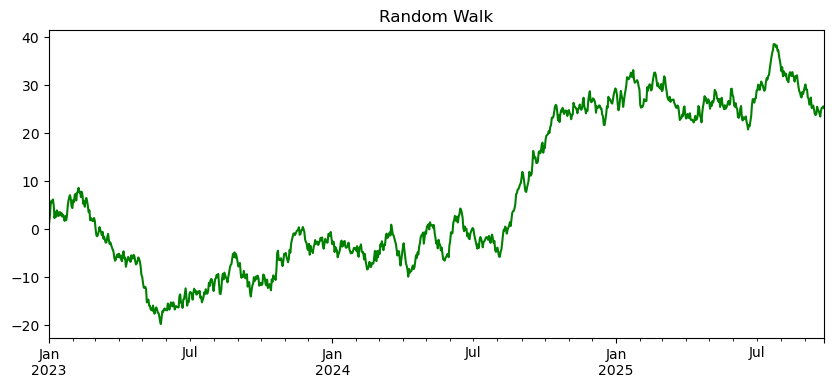

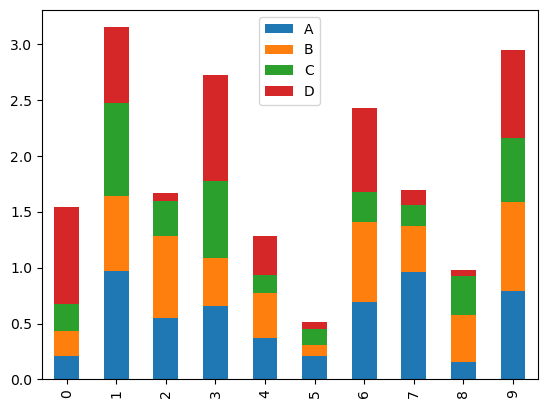

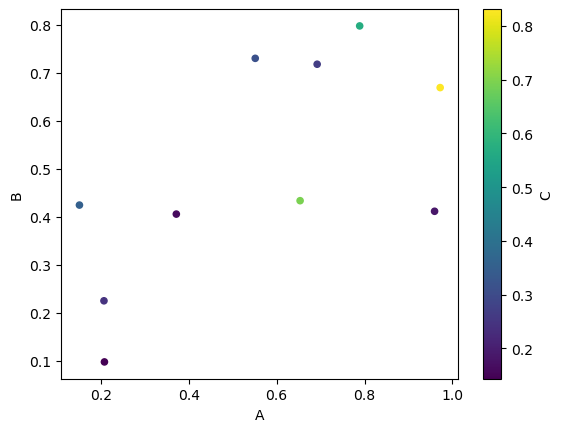

In [22]:
import matplotlib.pyplot as plt

# Sample data
ts = pd.Series(np.random.randn(1000),
               index=pd.date_range('2023-01-01', periods=1000))
ts = ts.cumsum()

# Basic plotting
ts.plot(title='Random Walk', 
        figsize=(10, 4),
        color='green')
plt.show()

# DataFrame plotting
df = pd.DataFrame(np.random.rand(10, 4), 
                  columns=['A', 'B', 'C', 'D'])
df.plot.bar(stacked=True)
plt.show()

# Scatter plot
df.plot.scatter(x='A', y='B', c='C', colormap='viridis')
plt.show()